In [18]:
import cv2
import numpy as np
import pandas as pd
from matplotlib  import pyplot as plt
import webp
from PIL import Image,ImageDraw,ImageFont,ImageEnhance

In [19]:
# all global data
c = 11
fnt = ImageFont.truetype('./data/ARIBL0.ttf',c)
chl = list('$@B%8&WM#*oahkbdpqwmZO0QLCJUYXzcvunxrjft/\\|()1{}[]?-_+~<>i!lI;:,\^`.54')

In [20]:
def preRender(chs,c):
    trans = []
    for ch in chs:
        out = Image.new('L',(c,c),color = (0))
        d = ImageDraw.Draw(out)
        d.text((0,-2),ch,font = fnt, fill = (255))
        o = np.asarray(out)
        trans.append(o)
    return trans

In [21]:
img = cv2.imread('./data/test1.png')
imgShape = img.shape
imgr =  cv2.GaussianBlur(img, (c,c), 0)
imgrShape = (imgShape[0]//c,imgShape[1]//c)
chs = preRender(chl,c)

In [22]:
def mul(a1,a2):
    # a1 and a2 has same shape
    out = np.multiply(a1,a2/255)
    return out

In [28]:
Mask = np.zeros((imgShape[0],imgShape[1]),dtype = np.uint8) #1920x1080
for i in range(imgrShape[0]):
    for j in range(imgrShape[1]):
        color = imgr[i][j] # 3x1
        index = int(np.mean(color)%len(chs))
        Mask[i*c:(i+1)*c,j*c:(j+1)*c] = chs[index]
output = imgr
output = cv2.bitwise_and(output,output,mask = Mask)

True

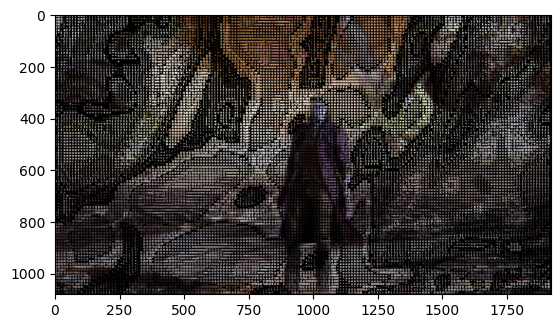

In [29]:
plt.imshow(output)
cv2.imwrite('test.png',output)